# GOAL: Create a model to predict whether or not a customer will Churn .
### My version: With Hyperparameter Tuning
## Practice Lab from Jose Portilla's Udemy Course: Python for DS and ML Masterclass
#### by: Henric R. Jandoc

## Part 0: Imports and Read in the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\henri\\Desktop\\ML Projects\\Datasets\\Telco-Customer-Churn.csv")

In [5]:
# inspect the data

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

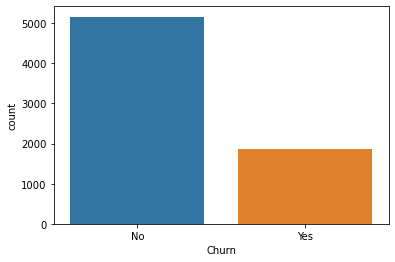

In [10]:
sns.countplot(data=df,x='Churn')

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

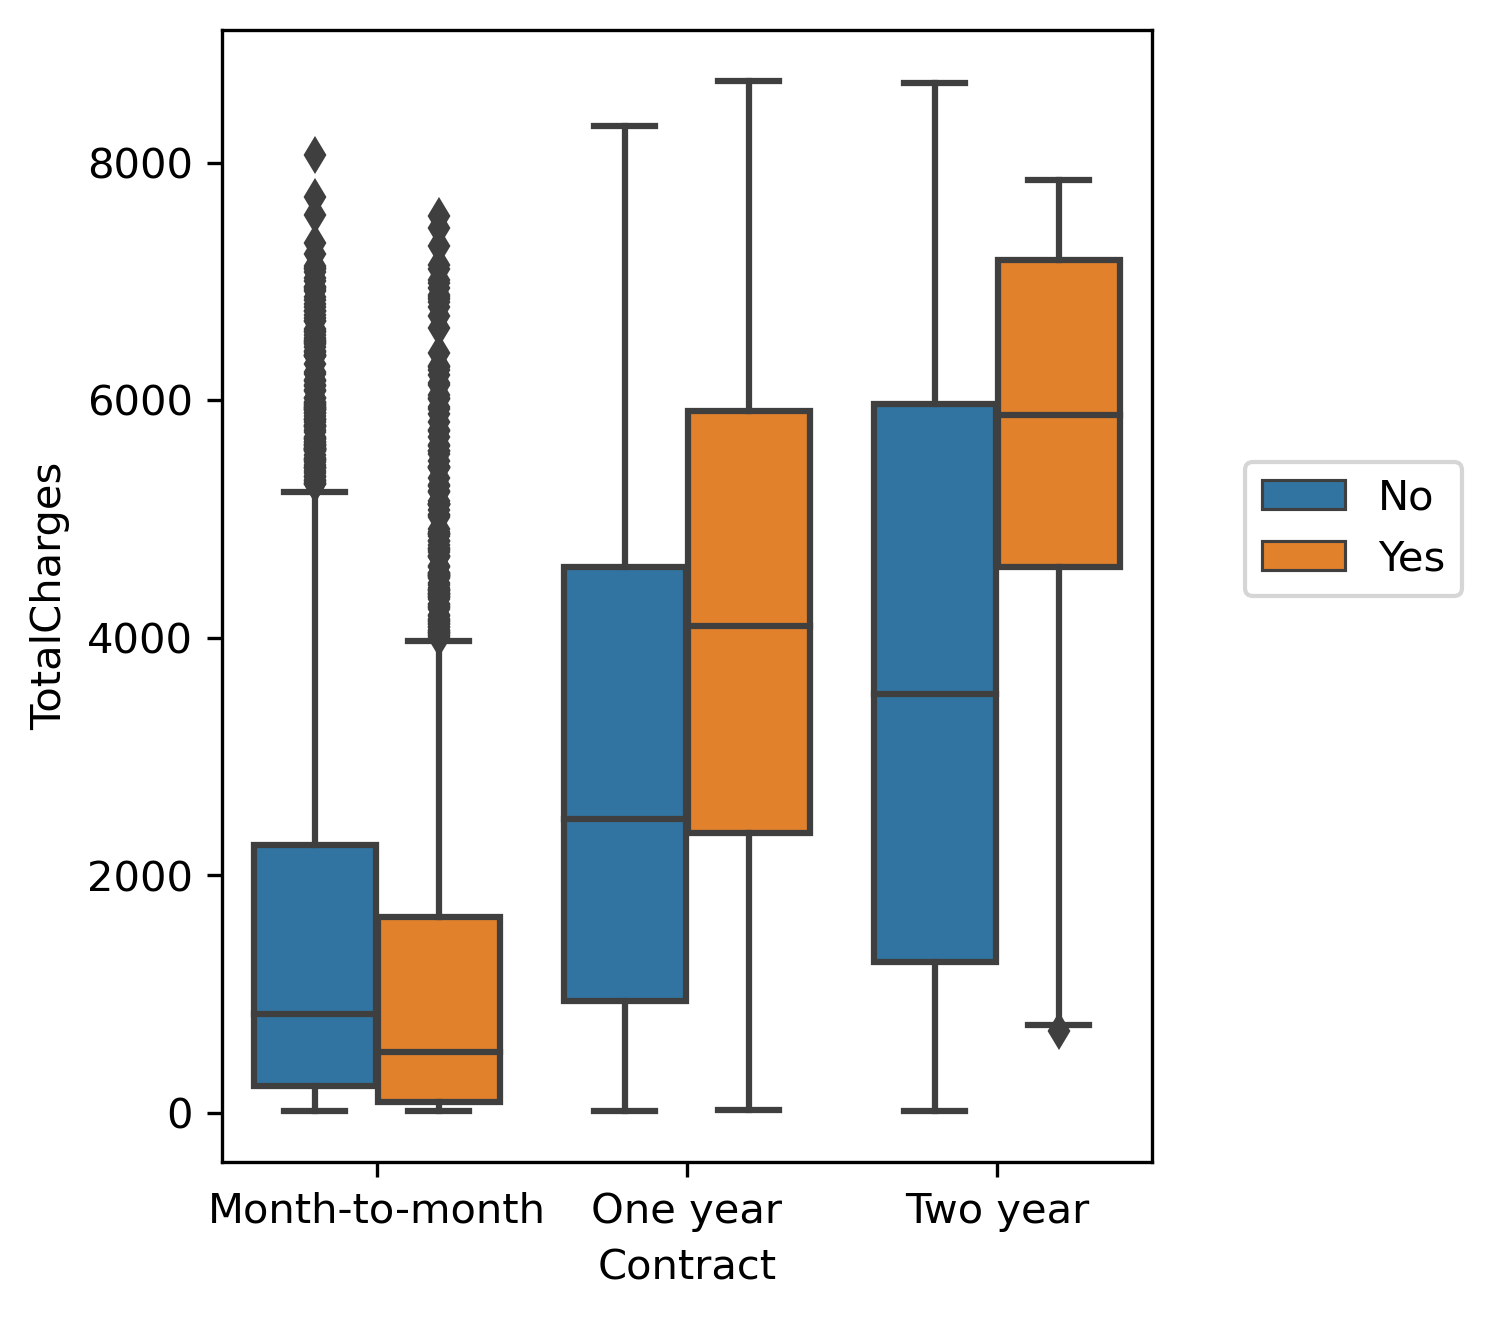

In [12]:
plt.figure(figsize=(4,5),dpi=300)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
dummy_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']])

corr_df = dummy_df.corr()

In [18]:
corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

In [20]:
correlations = corr_df['Churn_Yes'].sort_values().iloc[1:-1]
correlations

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [2]:
plt.style.use(['science', 'notebook', 'grid', 'no-latex'])

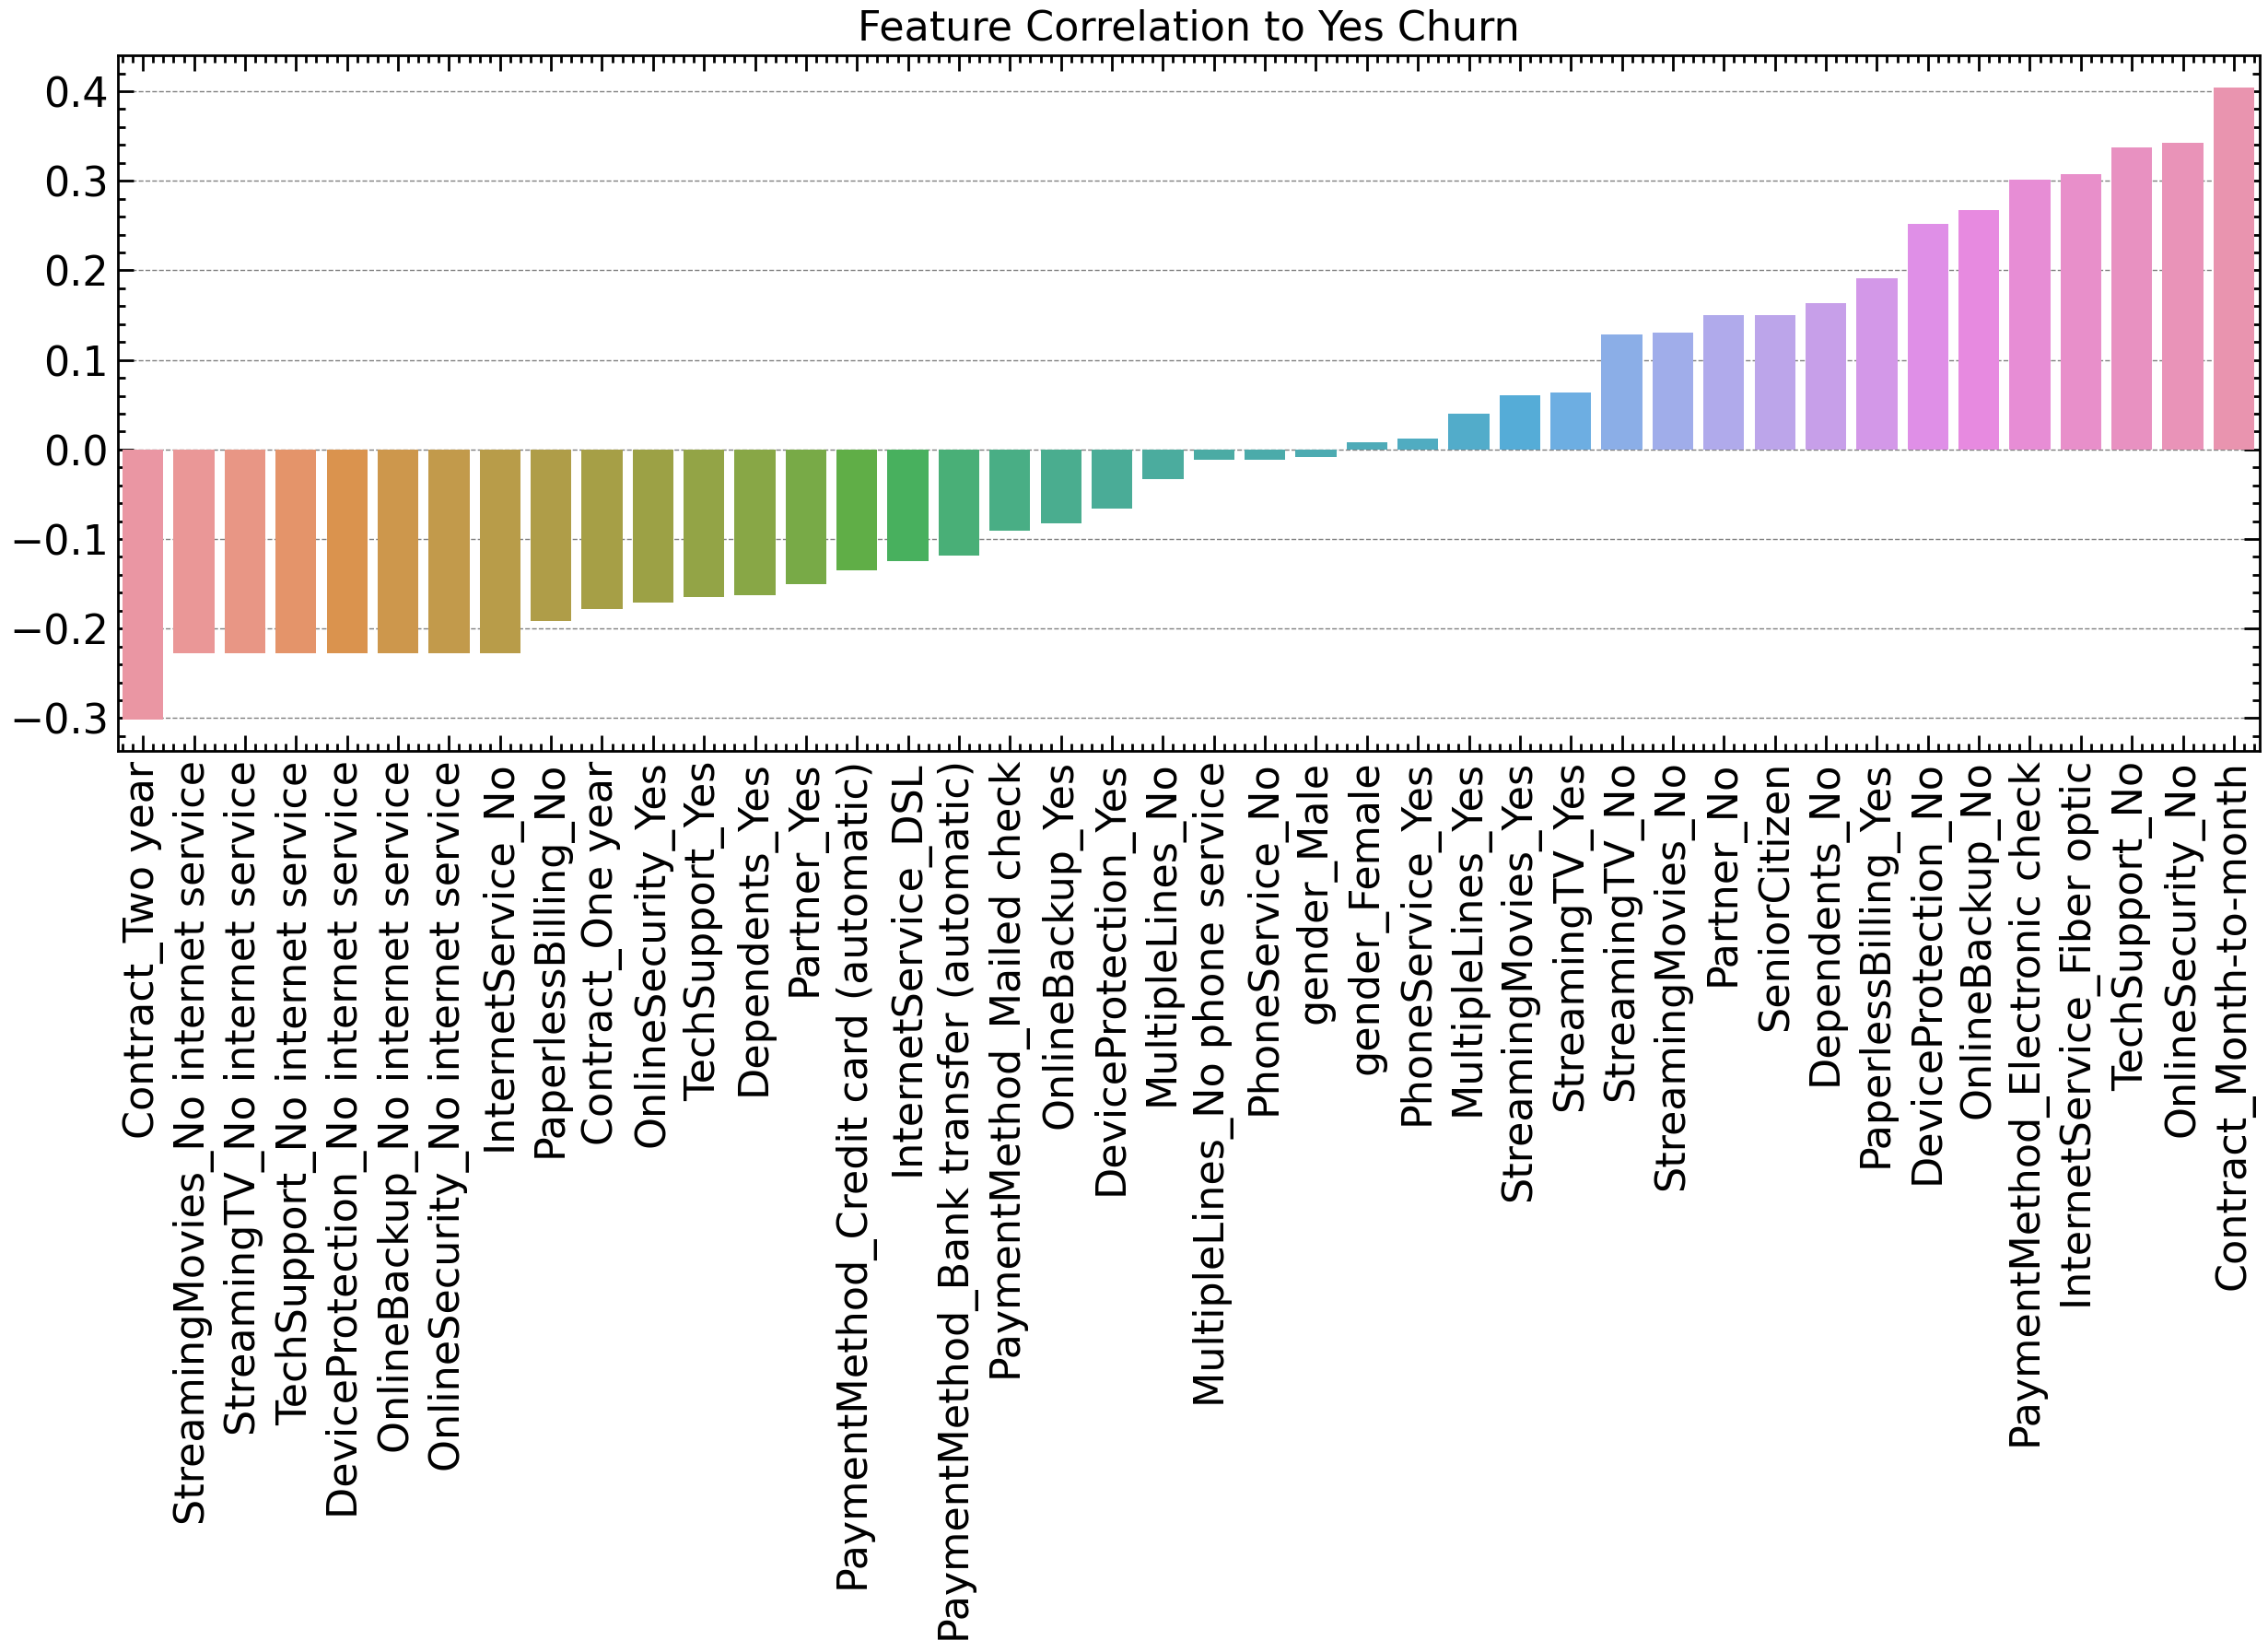

In [24]:
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,
            y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '24-48 Months'
   * '12-24 Months'
   * 'Over 48 Months'    

In [26]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [27]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [28]:
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK: Create a count plot showing the churn count per cohort.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

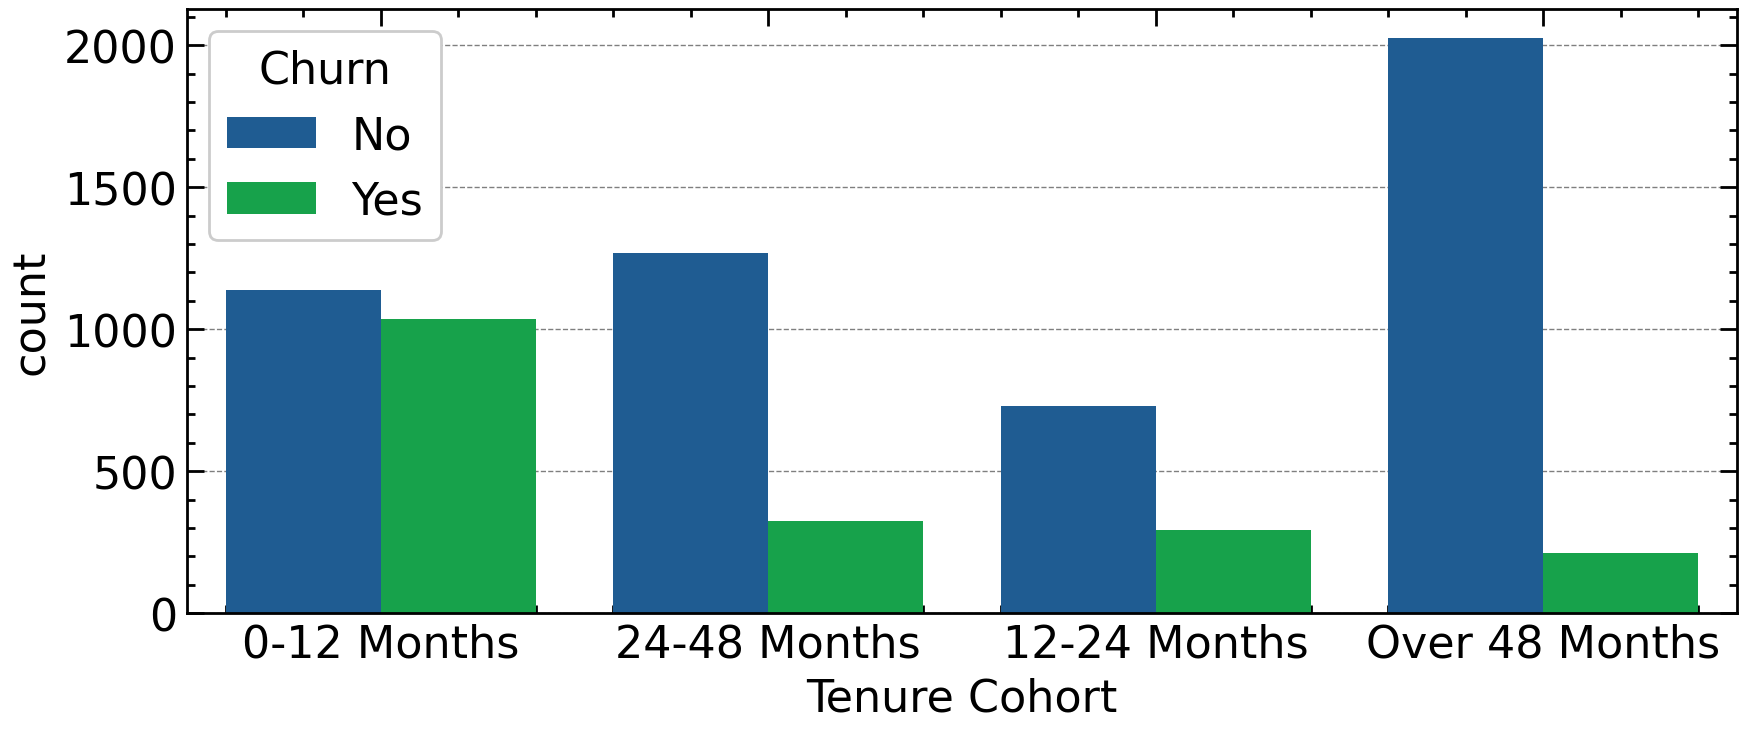

In [31]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

-----

# Part 4: Predictive Modeling

## Let's explore 3 different tree based methods: Random Forest, Adaptive Boosting (AdaBoost), and Extreme Gradient Boosting (XGBoost).

--------------------
# Random Forest Model

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [42]:
# import the models

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [43]:
# import the metrics

from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [47]:
rf = RandomForestClassifier(n_estimators=100)

# fit
rf.fit(X_train,y_train)

# predict
rf.predict(X_test)

preds_rf = rf.predict(X_test)

In [48]:
print(classification_report(y_test,preds_rf))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1052
         Yes       0.62      0.49      0.55       355

    accuracy                           0.80      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.80      0.79      1407



--------------------
# Gradient Boosting Model

In [51]:
gbm = GradientBoostingClassifier()

# fit
gbm.fit(X_train,y_train)

# predict
gbm.predict(X_test)

preds_gbm = gbm.predict(X_test)

In [52]:
print(classification_report(y_test,preds_gbm))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1052
         Yes       0.65      0.52      0.58       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



--------------------
# Adaptive Boosting Model

In [53]:
ada_model = AdaBoostClassifier()

# fit
ada_model.fit(X_train,y_train)

# predict
ada_model.predict(X_test)

preds_ada = ada_model.predict(X_test)

In [54]:
print(classification_report(y_test,preds_ada))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1052
         Yes       0.64      0.55      0.59       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



--------------------
# Hyperparameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [26]:
# Define the hyperparameters grid to search

rf_param_grid = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': [None, 5, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
}

gbm_param_grid = {
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7, 9, 11],
}

adaboost_param_grid = {
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}

# define models
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()
gbm_model = GradientBoostingClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

grid_search_gbm = GridSearchCV(gbm_model, gbm_param_grid, cv=5, scoring='accuracy')
grid_search_gbm.fit(X_train, y_train)

grid_search_ada = GridSearchCV(ada_model, adaboost_param_grid, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters: {best_params_rf}")

best_params_gbm = grid_search_gbm.best_params_
print(f"Best Hyperparameters: {best_params_gbm}")

best_params_ada = grid_search_ada.best_params_
print(f"Best Hyperparameters: {best_params_ada}")

NameError: name 'RandomForestClassifier' is not defined

In [71]:
rf_tuned = RandomForestClassifier(max_depth = 40, min_samples_split = 10, n_estimators = 250)

# fit
rf_tuned.fit(X_train,y_train)

# predict
rf_tuned.predict(X_test)

preds_rf_tuned = rf_tuned.predict(X_test)

#############################

gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 100)

# fit
gbm_tuned.fit(X_train,y_train)

# predict
gbm_tuned.predict(X_test)

preds_gbm_tuned = gbm_tuned.predict(X_test)

#############################

ada_tuned = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 400)

# fit
ada_tuned.fit(X_train,y_train)

# predict
ada_tuned.predict(X_test)

preds_ada_tuned = ada_tuned.predict(X_test)

In [72]:
print(classification_report(y_test,preds_rf_tuned))
print(classification_report(y_test,preds_gbm_tuned))
print(classification_report(y_test,preds_ada_tuned))

              precision    recall  f1-score   support

          No       0.84      0.91      0.88      1052
         Yes       0.65      0.50      0.56       355

    accuracy                           0.81      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.81      0.80      1407

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1052
         Yes       0.65      0.52      0.58       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1052
         Yes       0.66      0.53      0.59       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [73]:
print(classification_report(y_test,preds_rf_tuned))
print(classification_report(y_test,preds_rf))

              precision    recall  f1-score   support

          No       0.84      0.91      0.88      1052
         Yes       0.65      0.50      0.56       355

    accuracy                           0.81      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.81      0.80      1407

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1052
         Yes       0.62      0.49      0.55       355

    accuracy                           0.80      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.80      0.79      1407



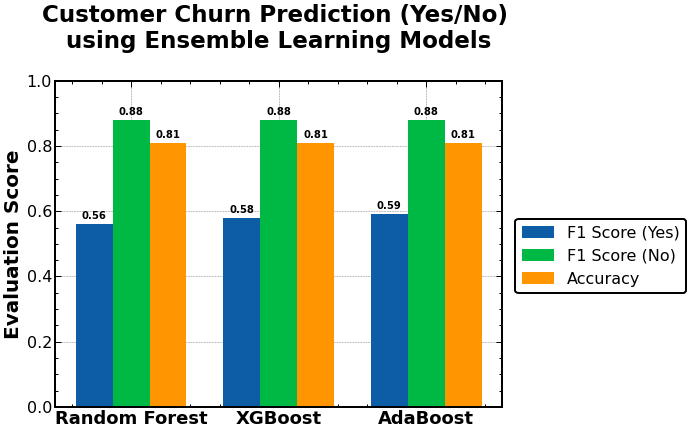

In [28]:
f1_yes_scores = [0.56, 0.58, 0.59]  
f1_no_scores = [0.88, 0.88, 0.88]    
accuracy_scores = [0.81, 0.81, 0.81]  

models = ['Random Forest', 'XGBoost', 'AdaBoost']

# Plotting
bar_width = 0.25
index = np.arange(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index - bar_width, f1_yes_scores, bar_width, label='F1 Score (Yes)')
bar2 = ax.bar(index, f1_no_scores, bar_width, label='F1 Score (No)')
bar3 = ax.bar(index + bar_width, accuracy_scores, bar_width, label='Accuracy')

ax.set_ylabel('Evaluation Score', fontweight = 'bold', size = 20)
ax.set_title('Customer Churn Prediction (Yes/No) \n using Ensemble Learning Models \n', 
             size = 23, fontweight = 'bold')
ax.set_xticks(index)
ax.set_xticklabels(models, fontweight = 'bold', size = 18)
ax.set_ylim(0, 1.0)
ax.set

# Move the legend to the upper right without overlapping
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.43, 0.60), ncol=1)
legend.get_frame().set_edgecolor('black')  
legend.get_frame().set_linewidth(2)        

# Borders

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

# Display the scores on top of the bars
for i, v in enumerate(f1_yes_scores):
    ax.text(i - bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight = 'bold')

for i, v in enumerate(f1_no_scores):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight = 'bold')

for i, v in enumerate(accuracy_scores):
    ax.text(i + bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight = 'bold')
    
#plt.savefig('Customer Churn Prediction Eval.jpg', dpi = 300)